<a href="https://colab.research.google.com/github/phystopia/pyromat-thermodynamics/blob/main/cycle_refrigeration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cycle - Refrigerators & Heat Pumps

Nitrogen $(N_2)$ gas in a piston–cylinder assembly undergoes a thermodynamic cycle that starts in state *1* with $P_1 = 100 \, \mathrm{kPa}$ and $\upsilon_1 = 0,5995 \, \mathrm{\frac{m^3}{kg}}$ and continues in the following way: <br>
**Process 1➛2:** polytropic compression $\left( P \cdot \upsilon^n = \mathrm{constant} \right)$ with $n=1.399462$, until $P_2 = 400 \, \mathrm{kPa}$. <br>
**Process 2➛3:** isochoric depressurization  $\left( \upsilon = \upsilon_2 \right)$ from $P_2$ to $P_3 = P_1$. <br>
**Process 3➛1:** isobaric expansion $\left( P = P_1 \right)$ from $\upsilon_3$ to $\upsilon_1$.

## Gas Data and Initial Values of the Problem

**Gas constant**

In [ ]:
R_n2 = 0.2968

**Specific heat @ constant volume**

In [ ]:
cv_n2 = 0.743

**Polytropic exponent** 

In [ ]:
n = 1.399462

**Initial Values:** <br>
The given data are the initial pressure $(P_1)$ and specific volume $(\upsilon_1)$, as well as the pressure at state 2 $(P_2)$.

In [ ]:
P1 = 100 # kPa
print('P1:', P1,'kPa')

P1: 100 kPa


In [ ]:
v1 = 0.5995 # m³/kg
print('v1:', v1,'m³/kg')

v1: 0.5995 m³/kg


In [ ]:
P2 = 400 # kPa
print('P2:', P2,'kPa')

P2: 400 kPa


## States

### State 1

$$ P_1 \, \upsilon_1 = R \, T $$ <br>
$$ T = \frac{P_1 \, \upsilon_1}{R_{_{N_2}}} $$

In [ ]:
T1 = P1 * v1 / R_n2
print('T1:', np.round(T1,1),'K')

T1: 202.0 K


### State 2

$$ \upsilon_2 = \upsilon_1 \; \left( \frac{P_1}{P_2} \right)^{\frac{1}{n}} $$

In [ ]:
v2 = v1 * np.power(P1/P2,1/n)
print('v2:', np.round(v2,4), 'm³/kg')

v2: 0.2226 m³/kg


$$ T_2 = \frac{P_2 \, \upsilon_2}{R_{_{N_2}}} $$

In [ ]:
T2 = P2 * v2 / R_n2
print('T2:', np.round(T2,2),'K')

T2: 300.04 K


### State 3

In [ ]:
P3 = P1
print('P3:', P3,'kPa')

P3: 100 kPa


In [ ]:
v3 = v2
print('v2:', np.round(v3,4), 'm³/kg')

v2: 0.2226 m³/kg


$$ T_3 = \frac{P_3 \, \upsilon_3}{R_{_{N_2}}} $$

In [ ]:
T3 = P3 * v3 / R_n2
print('T3:', np.round(T3,2),'K')

T3: 75.01 K


## Processes

### Process *1* $\rightarrow$ *2*: Polytropic compression

**Specific work:**

$$ w_{_{1 \rightarrow 2}} = \frac{P_2 \, \upsilon_2 - P_1 \, \upsilon_1}{1-n} $$

In [ ]:
n=1.399462
w12 = (P2 * v2 - P1 * v1 ) / (1 - n)
print('w12:', np.round(w12,3), 'kJ/kg')

w12: -72.852 kJ/kg


**Specific change in internal energy:**

$$ \Delta u_{_{1 \rightarrow 2}} = c_{v_{_{N_2}}} \, \left( T_2 - T_1 \right) $$

In [ ]:
u12 = cv_n2 * (T2 - T1)
print('u12:', np.round(u12,3), 'kJ/kg')

u12: 72.852 kJ/kg


**Specific heat:**

$$ q_{_{1 \rightarrow 2}} = \Delta u_{_{1 \rightarrow 2}} + w_{_{1 \rightarrow 2}} $$

In [ ]:
q12 = u12 + w12
print('q12:', np.round(q12,3), 'kJ/kg')

q12: 0.0 kJ/kg


The fact that $q_{_{1 \rightarrow 2}} = 0$ means that this process is **adiabatic**, *i. e.* the system does not interchange heat with the environment.

### Proceso 2 $\rightarrow$ 3: Isochoric depressurization

**Specific work:**

$$ w_{_{2 \rightarrow 3}} = 0 $$

In [ ]:
w23 = 0
print('w23:', np.round(w23,3), 'kJ/kg')

w23: 0 kJ/kg


**Change in specific internal energy:**

$$ \Delta u_{_{2 \rightarrow 3}} = c_{v_{_{N_2}}} \, \left( T_3 - T_2 \right) $$

In [ ]:
u23 = cv_n2 * (T3 - T2)
print('u23:', np.round(u23,3), 'kJ/kg')

u23: -167.197 kJ/kg


$$ q_{_{2 \rightarrow 3}} = \Delta u_{_{2 \rightarrow 3}} + w_{_{2 \rightarrow 3}} $$

In [ ]:
q23 = u23 + w23
print('q23:', np.round(q23,3), 'kJ/kg')

q23: -167.197 kJ/kg


### Process 3 $\rightarrow$ 1: Isobaric Expansion

**Specific work:**

$$ w_{_{3 \rightarrow 1}} = P_3 \cdot \left(\upsilon_1 - \upsilon_3 \right) $$

In [ ]:
w31 = P3 * (v1 - v3)
print('w31:', np.round(w31,3), 'kJ/kg')

w31: 37.687 kJ/kg


**Specific change in internal energy:**

$$ \Delta u_{_{3 \rightarrow 1}} = c_{v_{_{N_2}}} \, \left( T_1 - T_3 \right) $$

In [ ]:
u31 = cv_n2 * (T1 - T3)
print('u31:', np.round(u31,3), 'kJ/kg')

u31: 94.345 kJ/kg


**Specific heat:**

$$ q_{_{3 \rightarrow 1}} = \Delta u_{_{3 \rightarrow 1}} + w_{_{3 \rightarrow 1}} $$

In [ ]:
q31 = u31 + w31
print('q31:', np.round(q31,3), 'kJ/kg')

q31: 132.032 kJ/kg


## Diagrama P-$\upsilon$

In [ ]:
points = 100

In [ ]:
v = np.linspace(v1, v2, points)
# print('specific volume:', v, 'm³')

In [ ]:
P12 = P1 * np.power( v1/v, n)
# print('Pressure:', np.round(P12,2), 'kPa')

In [ ]:
P31 = P3 * np.power(v,0)
# print('Pressure:', np.round(P31,2), 'kPa')

In [ ]:
v23 = v2 * np.power(P12,0)
# print('specific volume:', v23, 'm³')

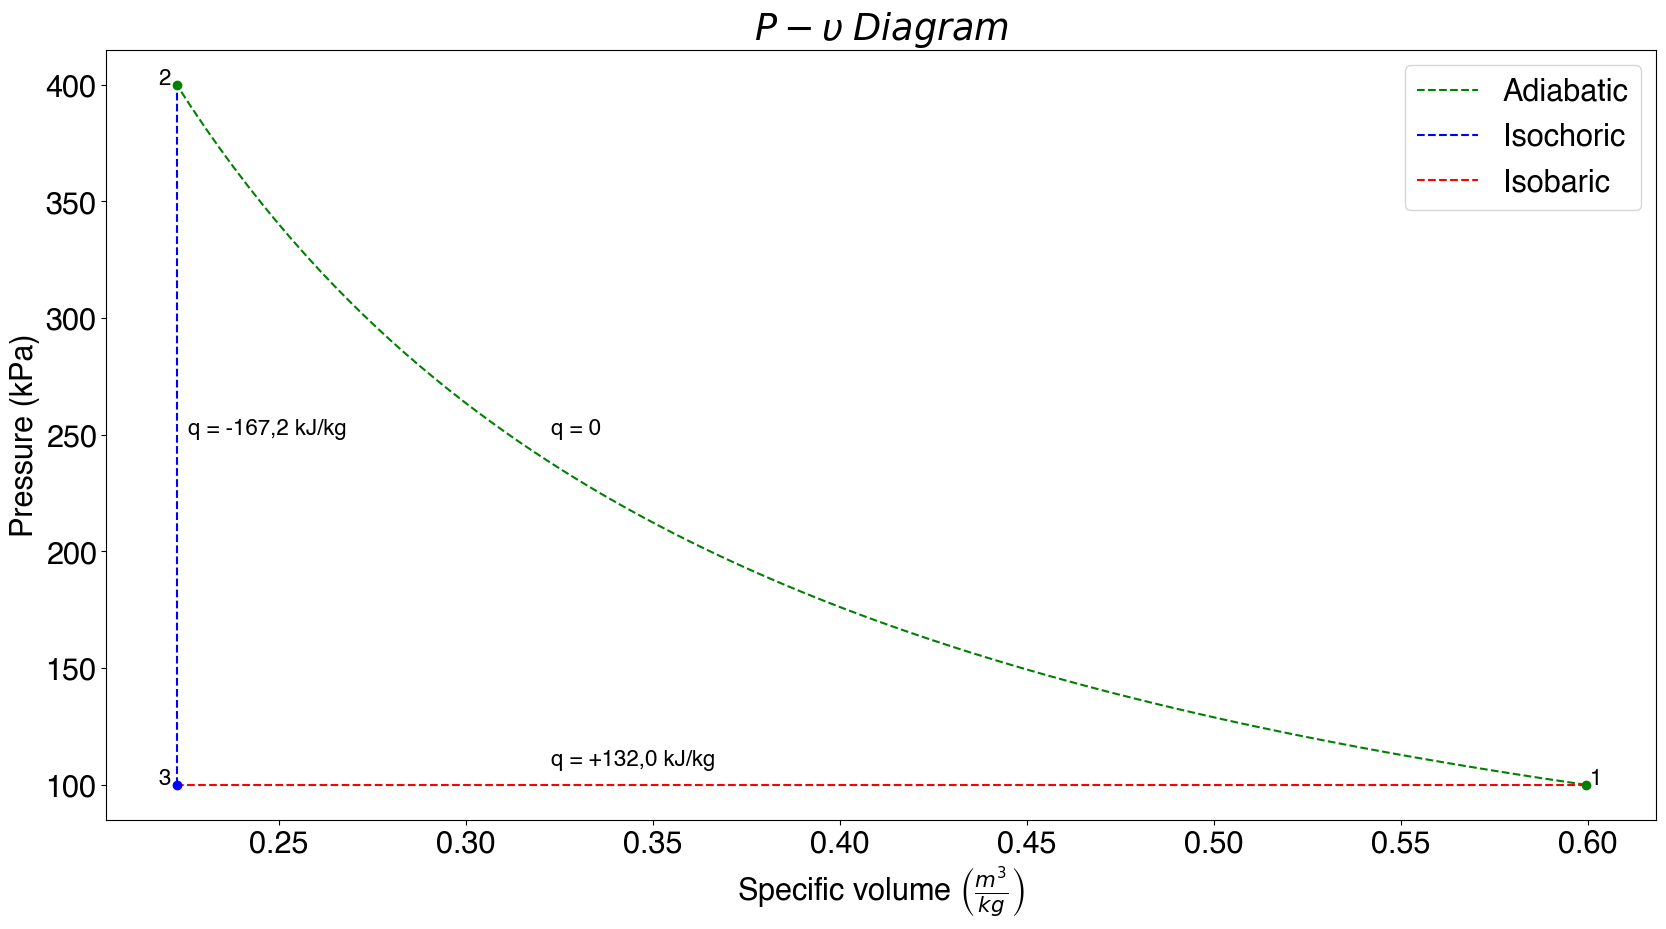

In [ ]:
font = {'family' : 'Helvetica',
        'size'   : 22}

fig, ax = plt.subplots(figsize = (20,10))

plt.title(r'$P - \upsilon \; Diagram$')
plt.rc('font', **font)

plt.plot(  v,P12, 'g--', linewidth = 1.5, label = 'Adiabatic')
plt.plot(v23,P12, 'b--', linewidth = 1.5, label = 'Isochoric')
plt.plot(  v,P31, 'r--', linewidth = 1.5, label = 'Isobaric')

plt.plot(v1, P1, 'go')
plt.plot(v2, P2, 'go')
plt.plot(v3, P3, 'bo')

ax.text(v1 + 0.001, P1, 1, size = 16)
ax.text(v2 - 0.005, P2, 2, size = 16)
ax.text(v3 - 0.005, P3, 3, size = 16)

ax.text(v2 + 0.1   , P1 + (P2-P1)/2, 'q = 0', size=16) # 1-2
ax.text(v2 + 0.003 , P1 + (P2-P1)/2, 'q = -167,2 kJ/kg', size=16) # 2-3
ax.text(v2 + 0.1   , P1 + 8        , 'q = +132,0 kJ/kg', size=16) # 3-1

plt.ylabel(r'Pressure (kPa)')
plt.xlabel(r'Specific volume $\left( \frac{m^3}{kg} \right)$')

plt.legend()
plt.show()

## Cycle

### Energy Balance

|      Process      |     w (kJ/kg)        |     $\Delta$u (kJ/kg)       |      q (kJ/kg)       |
| ----------------- | -------------------- | --------------------------- | -------------------- |
| 1 $\rightarrow$ 2 |       -72,9          |            72,9             |         0,0          |
| 2 $\rightarrow$ 3 |         0,0          |          -167,2             |      -167,2          |
| 3 $\rightarrow$ 1 |        37,7          |            94,3             |       132,0          |
|     **Cycle**     |       -35,2          |            0,0              |       -35,2          |

### Net specific work 

$$ w_{cycle} = \sum w $$

In [ ]:
w_net = w12 + w23 + w31
print('w_net:', np.round(w_net,3), 'kJ/kg')

w_net: -35.164 kJ/kg


### Heat Taken from the Cold Reservoir

$$ q_{in} = q_{_{3 \rightarrow 1}} $$

In [ ]:
q_in = q31
print('q_in:', np.round(q_in,3), 'kJ/kg')

q_in: 132.032 kJ/kg


### Heat Rejected to the Hot Reservoir

$$ q_{out} = q_{_{2 \rightarrow 3}} $$

In [ ]:
q_out = q23
print('q_out:', np.round(q_out,3), 'kJ/kg')

q_out: -167.197 kJ/kg


$$ T_C = T_3 $$

For cycles of this type, $q_{in}$ is the energy transferred by heat into the system undergoing the cycle from the cold body, and $q_{out}$ is the energy discharged by heat transfer from the system to the hot body. To accomplish these energy transfers requires a net work input, $w_{cycle}$. 

The quantities $q_{in}$, $q_{out}$, and $w_{cycle}$ are related by the energy balance, which for refrigeration and heat pump cycles takes the form:

$$ w_{cycle} = q_{out} - q_{in} $$

## Refrigeration Cycle

The objective of a refrigeration cycle is to cool a refrigerated space or to maintain the temperature within a dwelling or other building below that of the surroundings.

### Coefficient of Performance

The performance of refrigeration cycles can be described as the ratio of the amount of energy received by the system undergoing the cycle from the cold body, $q_{in}$, to the net work into the system to accomplish this effect, $w_{cycle}$.

$$ CoP_{_R} = \frac{\mathrm{Desired} \; \mathrm{Output}}{\mathrm{Required} \; \mathrm{Input}} = \frac{q_{in}}{\mid w_{cycle} \mid} $$

In [ ]:
cop_r = q_in / np.abs(w_net)
print("COP_{_R} =", np.round(cop_r,3))

COP_R = 3.755


an alternative expression for $CoP_{_R}$ is obtained as:

$$ CoP_{_R} = \frac{q_{in}}{\mid w_{net} \mid} = \frac{q_{in} }{\mid q_{out} - q_{in} \mid}= \frac{1}{\frac{\mid q_{out} \mid}{q_{in}} - 1}$$

In [ ]:
cop_r = 1 / (np.abs(q_out)/q_in - 1)
print("COP_R =", np.round(cop_r,3))

COP_R = 3.755


## Heat Pump Cycle

The objective of a heat pump is to maintain the temperature within a dwelling or other building above that of the surroundings or to provide heating for certain industrial processes that occur at elevated temperatures.

### Coefficient of Performance

The performance of heat pumps can be described as the ratio of the amount of energy discharged from the system undergoing the cycle to the hot body, $q_{out}$, to the net work into the system to accomplish this effect, $w_{cycle}$. 

$$ CoP_{_{HP}} = \frac{\mathrm{Desired} \; \mathrm{Output}}{\mathrm{Required} \; \mathrm{Input}} = \frac{q_{out}}{w_{cycle}} $$

In [ ]:
cop_hp = q_out / w_net
print("COP_hp =", np.round(cop_hp,3))

COP_hp = 4.755


An alternative expression for this coefficient of performance is:

$$ CoP_{_{HP}} = \frac{q_{out}}{w_{net}} = \frac{q_{out} }{q_{out} - q_{in}}= \frac{1}{1 - \frac{q_{in}}{\mid q_{out} \mid}}$$

In [ ]:
cop_hp = 1 / (1 - q_in / np.abs(q_out))
print("COP_hp =", np.round(cop_hp,3))

COP_hp = 4.755


### Temperature of the Hot Reservoir (maximum temperature in the cycle)

$$ T_H = T_1 $$

In [ ]:
TH = T1
print("TH =", np.round(TH,1), "K")

TH = 202.0 K


### Temperature of the Cold Reservoir (minimum temperature in the cycle)

In [ ]:
TC = T3
print("TC =", np.round(TC,1), "K")

TC = 75.0 K
